Filename: exposure_B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (512, 512)   float32   
FITS Header Cards:
SIMPLE  =                    T / Written by IDL:  Thu Oct 12 16:28:37 2006      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  512 /                                                
NAXIS2  =                  512 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2006-10-12'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
Data shape: (512, 512)
Data type: >f4


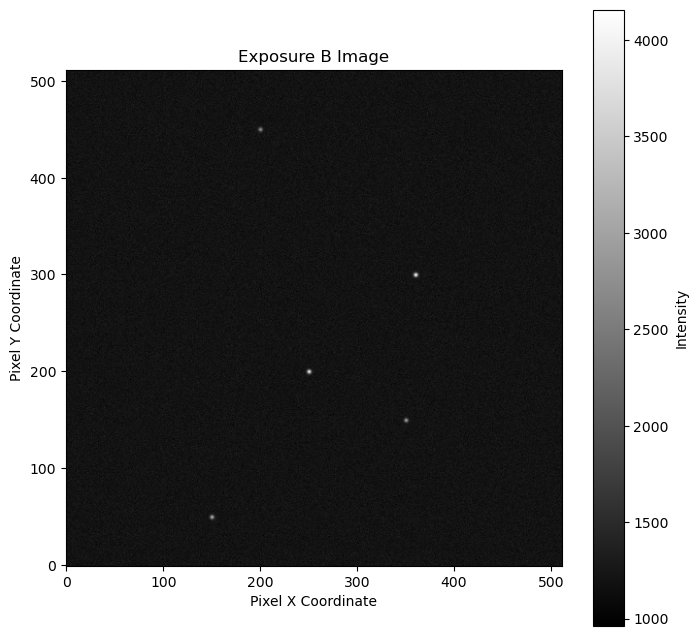

Filename: exposure_V.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (512, 512)   float32   
Data shape: (512, 512)
Data type: >f4


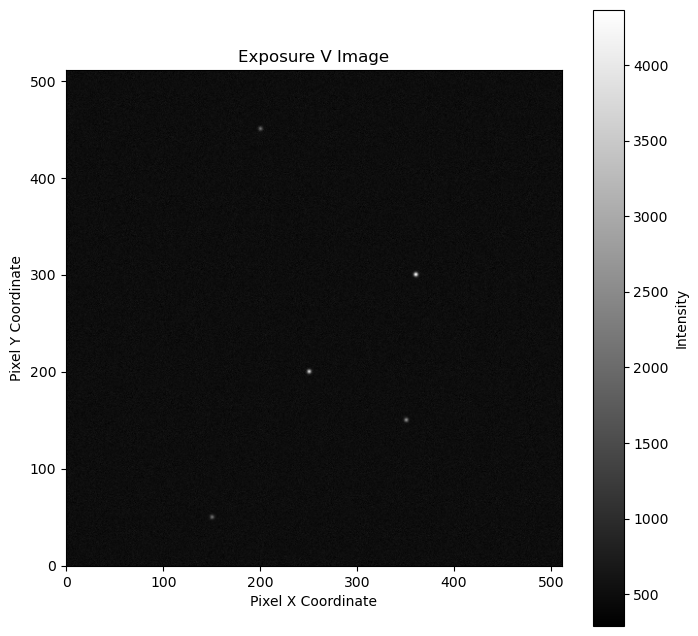

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


# Open the FITS file
with fits.open("exposure_B.fits") as hdul:
    # Print information about the FITS file
    hdul.info()
    
    # Access the data from the first HDU
    B_data = hdul[0].data
    header = hdul[0].header
    
    # Print the header cards
    print("FITS Header Cards:")
    for card in header.cards:
        print(card)
    # Check the data shape and type
    print("Data shape:", B_data.shape)
    print("Data type:", B_data.dtype)

# Visualize the data
plt.figure(figsize=(8, 8))
plt.imshow(B_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure B Image')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.savefig('pdf/Exposure_B.pdf')
plt.show()


# Open the FITS file
with fits.open("exposure_V.fits") as hdul:
    # Print information about the FITS file
    hdul.info()
    
    # Access the data from the first HDU
    V_data = hdul[0].data
    
    # Check the data shape and type
    print("Data shape:", V_data.shape)
    print("Data type:", V_data.dtype)

# Visualize the data
plt.figure(figsize=(8, 8))
plt.imshow(V_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure V Image')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.savefig('pdf/Exposure_V.pdf')
plt.show()

Function names in sp.py:
['Oneside', 'aper', 'arc', 'chord', 'find', 'intarea', 'meanclip', 'mmm', 'pixwt', 'regextract', 'saveFITS']

 Identified stars B-Band:
Amount of stars: 5
X coordinates: [150.00147683 349.99606642 249.99917808 359.99397826 200.00653572]
Y coordinates: [ 50.00004463 150.00254542 200.00615032 299.99493556 449.99112163]
Flux values: [1564.5468 1658.0742 2115.29   2265.6057 1167.367 ]
Sharpness values: [0.3567335  0.35045186 0.37784037 0.3462256  0.29734156]
Roundness values: [-0.07848927 -0.0589697   0.07076368  0.126086    0.24989598]
x, y in pixels, flux and sky in ADU
aperture radius is 5 pixels
x		 y		 flux 		sky
150.00147683182547 	 50.0000446323924 	 28433.12412583994 	 1199.398175790943
349.9960664160564 	 150.00254542007795 	 23581.57077209049 	 1205.1389858160974
249.99917807983684 	 200.00615032316298 	 39652.09516690401 	 1200.8499962861401
359.99397826127733 	 299.9949355645372 	 42270.59890785089 	 1202.2954930547457
200.00653571677293 	 449.991121625

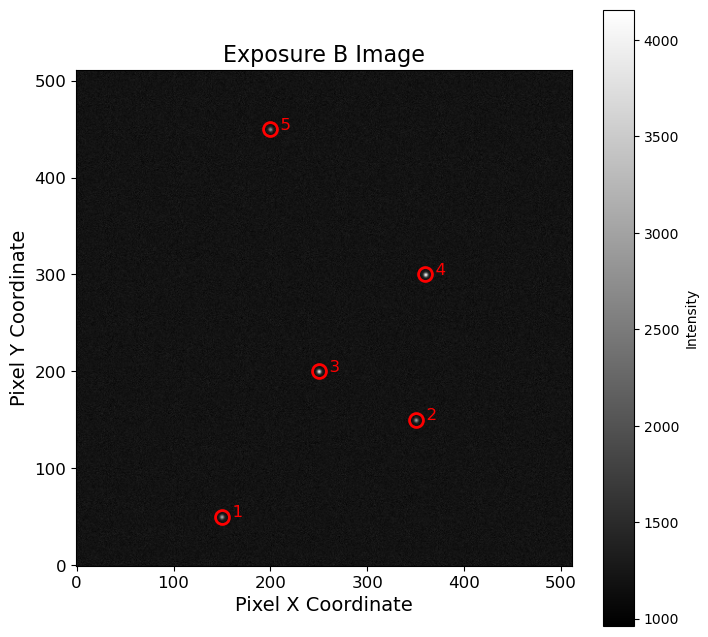


Identified stars V-band:
Amount of stars: 5
X coordinates: [149.9973505  349.99560679 249.99785109 359.99761355 199.98323952]
Y coordinates: [ 49.99632994 150.0021775  200.00021487 300.00460373 450.00136835]
Flux values: [1244.2421 1811.7173 2620.8599 2980.8616 1417.6034]
Sharpness values: [0.37456483 0.34190357 0.35298613 0.35263604 0.3732464 ]
Roundness values: [-0.07206799  0.08483481  0.1267929  -0.00532324 -0.0024295 ]


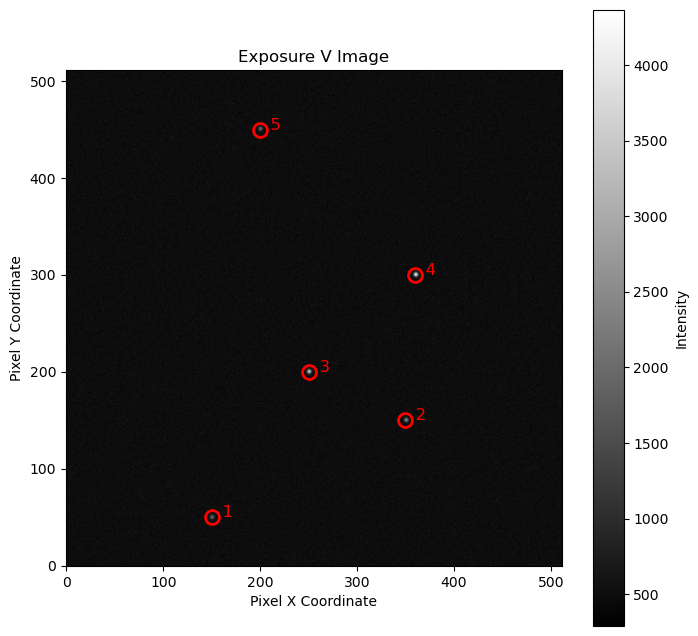

x, y in pixels, flux and sky in ADU
aperture radius is 5 pixels
x		 y		 flux 		sky
149.99735049608242 	 49.99632993670985 	 23501.47353951013 	 497.53591624027536
349.9956067884739 	 150.00217749835616 	 29105.533810071473 	 505.57819260213716
249.99785109318913 	 200.00021487110158 	 44834.19356732291 	 492.4565329202792
359.99761355330037 	 300.00460373436124 	 54996.43354898079 	 498.970214112892
199.9832395245205 	 450.0013683482431 	 21500.891488963425 	 504.23903044181066


In [91]:

import sp
# List all names defined in the module
all_names = dir(sp)

# Filter to get only callable functions
function_names = [name for name in all_names if callable(getattr(sp, name))]

print("Function names in sp.py:")
print(function_names )

hmin = 1000  # Minimum threshold for detection
fwhm = 3   # FWHM to be used for the convolution filter
results = sp.find(image=B_data, hmin=hmin, fwhm=fwhm)
# Print results

print("\n Identified stars B-Band:")
print('Amount of stars:', len(results[0]))
print("X coordinates:", results[0])
print("Y coordinates:", results[1])
print("Flux values:", results[2])
print("Sharpness values:", results[3])
print("Roundness values:", results[4])

aperture_radius = np.array([5])
skyrad = [6, 10]
flux_B , N_sky_B = sp.aper(image=B_data, xc=results[0], yc=results[1], apr=aperture_radius, skyrad=skyrad)
flux_B = flux_B.flatten()

plt.figure(figsize=(8, 8))
plt.imshow(B_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure B Image', fontsize=16)
plt.plot(results[0], results[1], 'ro', mfc='none', ms=10, mew=2)
for i, (x, y) in enumerate(zip(results[0], results[1])):
	plt.text(x, y, f'  {i+1}', color='red', fontsize=12)
plt.xlabel('Pixel X Coordinate' , fontsize=14)
plt.ylabel('Pixel Y Coordinate' , fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label sizes
plt.savefig('pdf/Exposure_B.pdf')
plt.show()



results2 = sp.find(image=V_data, hmin=hmin, fwhm=fwhm)
print("\nIdentified stars V-band:")
print('Amount of stars:', len(results2[0]))
print("X coordinates:", results2[0])
print("Y coordinates:", results2[1])
print("Flux values:", results2[2])
print("Sharpness values:", results2[3])
print("Roundness values:", results2[4])


plt.figure(figsize=(8, 8))
plt.imshow(V_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Exposure V Image')
plt.plot(results2[0], results2[1], 'ro', mfc='none', ms=10, mew=2)
for i, (x, y) in enumerate(zip(results2[0], results2[1])):
	plt.text(x, y, f'  {i+1}', color='red', fontsize=12)
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')
plt.savefig('pdf/Exposure_V.pdf')
plt.show()



flux_V , N_sky_V = sp.aper(image=V_data, xc=results2[0], yc=results2[1], apr=aperture_radius, skyrad=skyrad)
flux_V = flux_V.flatten()




            X           Y        Flux B      N_sky B        Flux V     N_sky V
0  150.001477   50.000045  28433.124126  1199.398176  23501.473540  497.535916
1  349.996066  150.002545  23581.570772  1205.138986  29105.533810  505.578193
2  249.999178  200.006150  39652.095167  1200.849996  44834.193567  492.456533
3  359.993978  299.994936  42270.598908  1202.295493  54996.433549  498.970214
4  200.006536  449.991122  21700.839875  1210.410470  21500.891489  504.239030


In [4]:
gain = 5 # e- / ADU
RON = 250 # Read out noise in e-
B_magnitude_zeropoint = 16.43
V_magnitude_zeropoint = 17.40
flux_B = flux_B / 30
flux_V = flux_V / 10
B_magnitudes = -2.5*np.log10(flux_B) + B_magnitude_zeropoint 
V_magnitudes = -2.5*np.log10(flux_V ) + V_magnitude_zeropoint 
print('The B magnitudes are ', B_magnitudes)
print('The V magnitudes are ', V_magnitudes)


color_BV =  B_magnitudes - V_magnitudes
print('The B-V color are', color_BV)

The B magnitudes are  [8.98824168 9.19137131 8.62713779 8.55770713 9.28161178]
The V magnitudes are  [8.97226227 8.74006108 8.27097659 8.04916368 9.06885883]
The B-V color are [0.01597942 0.45131023 0.35616119 0.50854345 0.21275295]


In [5]:
k = np.pi * aperture_radius **2
delta_t = 30
N_source =  flux_B 
N_sky = N_sky_B
sigma_source = np.sqrt(gain * N_source)
sigma_sky = np.sqrt(gain * N_sky)
sigma_RN = RON

sigma_tot = np.sqrt(gain * N_source + k*(gain * N_sky + sigma_RN**2))


SN_ratios_B = (gain * N_source  * np.sqrt(delta_t)) / (sigma_tot)
print(f'The S/N ratio of B fluxes {SN_ratios_B}')


k = np.pi * aperture_radius **2
delta_t = 10
N_source =  flux_V
N_sky = N_sky_V
sigma_source = np.sqrt(gain * N_source)
sigma_sky = np.sqrt(gain * N_sky)
sigma_RN = RON

sigma_tot = np.sqrt(gain * N_source + k*(gain * N_sky + sigma_RN**2))


SN_ratios_V = (gain * N_source  * np.sqrt(delta_t)) / (sigma_tot)
print(f'The S/N ratio of V fluxes is {SN_ratios_V}')

The S/N ratio of B fluxes [11.1856719   9.27581174 15.59571385 16.62405815  8.53463448]
The S/N ratio of V fluxes is [16.42877942 20.33447363 31.31495576 38.38428999 15.02786938]


In [6]:
B_foton_error = flux_B*gain / SN_ratios_B

B_magnitudes_error = np.sqrt(B_foton_error**2 * (2.5 / (flux_V*gain * np.log(10)))**2)


V_foton_error = flux_V*gain / SN_ratios_V

V_magnitudes_error = np.sqrt(V_foton_error**2 * (2.5 / (flux_B*gain * np.log(10)))**2)


print(B_magnitudes_error)
print(V_magnitudes_error)


[0.03914448 0.03161173 0.02052365 0.01673285 0.04279945]
[0.16387428 0.19770401 0.11760804 0.11040486 0.21474749]


In [7]:
color_BV_error = np.sqrt(B_magnitudes_error**2 + V_magnitudes_error**2)

In [8]:
print(color_BV_error)

[0.16848462 0.20021533 0.11938538 0.11166567 0.21897095]


In [9]:
import pandas as pd
mean_bv = pd.read_csv('mean_bv.csv', index_col=0)  # 'index_col=0' to keep the 'type' as index

print(mean_bv)
print(color_BV)

# Function to find the closest type for each B-V value
def find_closest_type(bv_value, mean_bv):
    return (mean_bv['B-V'] - bv_value).abs().idxmin()

# Apply the function to each B-V value in color_BV
matches = [find_closest_type(bv, mean_bv) for bv in color_BV]

# Display results
for bv, match in zip(color_BV, matches):
    print(f"B-V: {bv} -> Closest star type: {match}")


# Convert the DataFrame to LaTeX table format
latex_table = mean_bv.to_latex()

# Save it to a .tex file
with open('latex\mean_bv_table.tex', 'w') as f:
    f.write(latex_table)

           B-V
type          
A0V   0.010239
A1V   0.010821
A2I   0.073029
A2V   0.017663
A3V   0.036104
A5V   0.116673
A7V   0.096800
B0I  -0.128103
B0V  -0.211242
B1I  -0.092038
B1V  -0.201695
B2V  -0.189376
B3V  -0.124844
B5I  -0.012111
B5V  -0.105727
B6V  -0.093491
B7V  -0.084539
B8I   0.034839
B8V  -0.054230
B9V  -0.027125
F0I   0.180333
F2I   0.211504
F2V   0.272156
F4V   0.219100
F5V   0.328404
F6V   0.315589
F7V   0.362027
F8I   0.384879
F8V   0.383015
F9V   0.404096
G0I   0.528272
G0V   0.412689
G1V   0.456847
G2I   0.630223
G2V   0.447277
G5V   0.492636
G8I   0.836511
G8V   0.562876
K0V   0.543982
K3V   0.684181
K4V   0.693579
K5V   0.868615
K7V   1.011866
K8V   0.754849
K9V   1.037977
M0V   1.058941
M1I   1.453099
M1V   1.149093
M2V   1.176031
M4V   1.209478
M5V   1.158015
M6V   1.379054
M8V   1.058665
O5V  -0.202407
O7I  -0.171459
O7V  -0.200058
O8V  -0.195361
O9I  -0.172542
O9V  -0.212434
[0.01597942 0.45131023 0.35616119 0.50854345 0.21275295]
B-V: 0.01597941770652689 -> 

C:\Users\Damianko\AppData\Local\Temp\ipykernel_4884\2092466389.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = mean_bv.to_latex()


In [10]:
from astropy.table import Table
def convert_flux_density(flux_vega, wavelength ):
    """Convert from erg cm^-2 s^-1 Hz^-1 to erg cm^-2 s^-1 Å^-1"""
    return flux_vega * (3e18 / wavelength**2)

def calculate_magnitude(star_flux, vega_flux):
    """Calculate the magnitude in a band."""
    return -2.5 * np.log10(star_flux / vega_flux)


vega_path = fr'vega_fnu.csv'


vega_spectrum = Table.read(vega_path, format ="ascii.csv") 

vega_wavelength = vega_spectrum['wavelength'] * 10 # nanometers to angstrom
vega_flux_density = vega_spectrum['flux'] 

vega_converted_flux_density = convert_flux_density(vega_flux_density, vega_wavelength)




lambda_min = 3659 - 660 / 2
lambda_max = 3659 + 660 / 2

# Interpolate the flux within the B-band range
band_wavelengths = np.linspace(lambda_min, lambda_max, 100)



# Interpolate the flux within the B-band range
band_vega_wavelengths = np.linspace(lambda_min, lambda_max, 100)
band_vega_converted_flux_density = np.interp(band_wavelengths, vega_wavelength, vega_converted_flux_density)

#plt.plot(band_wavelengths, band_flux_density, label=band, color=filter_data['color'])

# Integrate flux over the wavelength range



M = 5* np.log10(7.75)  -5 - 0.03
print(M)
m = B_magnitudes[0]



distance = 10**((m-M +5)/5)
print(distance)

-0.5834914874684489
821.0065734926427


In [85]:
import pandas as pd

flux_B = np.array(flux_B)
flux_V = np.array(flux_V)

df_BV = pd.DataFrame({'Type': matches , 'X, Y': [(int(x), int(y)) for x, y in zip(results[0], results[1])],  'Flux B': np.round(flux_B/1000).astype(int), 'Flux V': np.round(flux_V/1000, decimals=0).astype(int), 'Mag B': np.round(B_magnitudes, decimals=2), 'Mag_B error': B_magnitudes_error , 'Mag_V error': V_magnitudes_error,  'Mag V': np.round(V_magnitudes, decimals=2), 'B-V': np.round(color_BV, decimals=2), 'B-V error': np.round(color_BV_error, decimals=2), 'S/N B': np.round(SN_ratios_B), 'S/N V': np.round(SN_ratios_V)})

print(df_BV)

# Convert the DataFrame to CSV
df_BV.to_csv('csv\df_BV.csv')


  Type        X, Y  Flux B  Flux V  Mag B  Mag_B error  Mag_V error  Mag V  \
0  A2V   (150, 50)      28      24   8.99     0.039144     0.163874   8.97   
1  G2V  (349, 150)      24      29   9.19     0.031612     0.197704   8.74   
2  F7V  (249, 200)      40      45   8.63     0.020524     0.117608   8.27   
3  G5V  (359, 299)      42      55   8.56     0.016733     0.110405   8.05   
4  F2I  (200, 449)      22      22   9.28     0.042799     0.214747   9.07   

    B-V  B-V error  S/N B  S/N V  
0  0.02       0.17   11.0   16.0  
1  0.45       0.20    9.0   20.0  
2  0.36       0.12   16.0   31.0  
3  0.51       0.11   17.0   38.0  
4  0.21       0.22    9.0   15.0  
